# business Problem

#### Objetivo do Problema
    -- Previsão do primeiro destino que um novo usuario irá escolher.

#### Porque?
**Qual tipo de modelo de negócio do AirBNB?**
    
    -- MarketPlace (Conecta pessoas que oferecem acomodação, com pessoas que estão procurando acomodação).

##### Oferta (Pessoas oferecendo acomodação)

    -- Tamanho do portfolio
    -- Diversidade/densidade de portfolio
    -- Preço medio

##### Demanda (Pessoas procurando acomodação)

    -- Numero de usuarios
    -- LTV (Lifitime Value)
    -- CAC (Client Acquisition Cost)

**Cross Revenue** (FEE * Numero Cliente) - CAC

#### Proposta da Solução

    -- Modelo de predição do primeiro destino de um novo usuario.

##### Tipos de formatos para entrega do projeto.
    -- Predições salva em tabela do banco de dados.
    -- API: Input: Usuario e suas caracteristicas / Output: Usuario e suas caracteristicas com as Predições do destino.

# Ciclo02: Imbalanced_Metrics

# 00 - Imports

In [1]:
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn import metrics as m
from scikitplot import metrics as mt

from keras import models as ml
from keras import layers as l

2022-11-16 19:54:10.140417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 19:54:10.310708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 19:54:10.310720: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 19:54:10.329999: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 19:54:10.747044: W tensorflow/stream_executor/platform/de

## Paths

In [32]:
path_data = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/data/'
path_model = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/models/'
path_transformation = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/transformation_data/'

## Loading Data

|Feature Name| Information|
|----------------|:---------------:|
|id:                         |ID do Usuario
|date_account_created:       |Data da Criação da Conta
|timestamp_first_active:     |Data do primeira acesso, note que pode ser anterior à data de criação da conta ou à data da primeira reserva porque um utilizador pode pesquisar antes de se inscrever
|date_first_booking:         |data da primeira reserva
|gender                      |Sexo
|age                         |Idade 
|signup_method               |Metodo de inscrição
|signup_flow:                |fluxo de inscrição: a página de onde um utilizador veio para se inscrever
|language:                   |Preferencia linguistica internacional
|affiliate_channel:          |canal afiliado: que tipo de marketing pago
|affiliate_provider:         |fornecedor afiliado: onde o marketing é, por exemplo, google, craigslist, outro
|first_affiliate_tracked:    |primeira afiliação rastreada: qual foi o primeiro marketing com que o utilizador interagiu antes da inscrição
|signup_app                  |Aplicativo de inscrição
|first_device_type           |Primeiro tipo de dispositivo
|first_browser               |Primeiro nagevagor
|country_destination:        |Destino do pai:Variavel alvo que deve prever


In [33]:
data = pd.read_csv(path_data+'train_users_2.csv')
data1 = pd.read_csv(path_data+ 'sessions.csv')

In [34]:
data.head(1).T

,0
id,gxn3p5htnn
date_account_created,2010-06-28
timestamp_first_active,20090319043255
date_first_booking,NaN
gender,-unknown-
age,NaN
signup_method,facebook
signup_flow,0
language,en
affiliate_channel,direct


# 1.0 Data Description

## Data Dimensions

In [35]:
print("Number of Rows {}".format(data.shape[0]))
print("Number of Rows {}".format(data.shape[1]))

Number of Rows 213451
Number of Rows 16


## Data Types

In [36]:
data.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## Check NA

In [37]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

### Treatment NA

In [38]:
data = data.dropna()

In [39]:
data.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

## Change data type

In [40]:
#date_account_created 
data['date_account_created'] = pd.to_datetime( data['date_account_created'] )

#timestamp_first_active
data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format='%Y%m%d%H%M%S')

#date_first_booking
data['date_first_booking'] = pd.to_datetime(data['date_first_booking'])

#age
data['age'] = data['age'].astype(int)


In [41]:
data.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [42]:
data.sample()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
7338,none1f3zv6,2011-08-06,2011-08-06 14:54:19,2011-08-27,FEMALE,46,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,US


### Check Balanced Data

In [43]:
data['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

Classe resposta bem desbalanceada, vamos seguir dessa forma para finalizarmos o pipeline com o primeiro ciclo de crisp

# 2.0 Descriptive Statistics

# 3.0 Feature Engineering

# 4.0 Data Filtering

In [44]:
data_filtering = data.copy()

# 5.0 Exploratory data analysis

# 6.0 Data Preparation 

In [45]:
data_preparation = data_filtering.copy()


### GetDummies values

In [46]:
#GetDummies values
data_preparation_dummies = pd.get_dummies(data_preparation.drop(['id', 'country_destination'], axis=1))

# Jooin id And country destination
data_preparation_final = pd.concat( [data_preparation[['id', 'country_destination']], data_preparation_dummies], axis=1)

# 7.0 Feature Selection

In [47]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']

data_selection = data_preparation_final.drop(cols_drop, axis=1)

In [48]:
X = data_selection.drop('country_destination', axis=1)
y = data_selection['country_destination'].copy()

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32)

In [50]:
x_train = X_train.drop('id', axis=1)
x_val = X_val.drop('id', axis=1)

In [51]:
ohe = pp.OneHotEncoder()

y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1)).toarray()

# 8.0 Machine Learning Model

### Baseline Model

para esse caso especifico, não seria justo termos um baseline onde os pesos das classes estão distribuidos igualmente, sabemos para este caso que temos muito mais ocorrencia para a classe US. Neste caso usamos o parametro "Weigth", para resolvermos essa questão e deixar mais ajustado o modelo baseline.

In [52]:
country_destination_list = data_selection['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_val.shape[0]
country_destination_weights = data_selection['country_destination'].value_counts( normalize=True).sort_index().tolist()

#Modelo Aleatório
yhat_random = random.choices( population=country_destination_list, k=k_num, weights=country_destination_weights)

Accuracy: 0.5136780344701137
Balanced Accuracy: 0.09090416542284246
Kappa Score: -0.002814609862120454


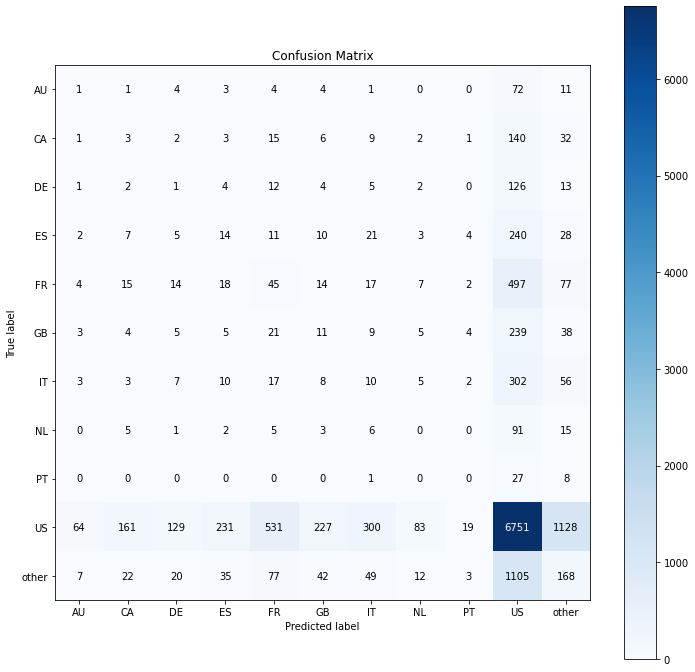

In [53]:
#Accuracy
acc_random = m.accuracy_score(y_val, yhat_random)
print('Accuracy: {}'.format(acc_random))

#Confusion Matrix
mt.plot_confusion_matrix( y_val, yhat_random, normalize= False, figsize=(12,12))

#Balanced Accuracy
balanced_accuracy_random = m.balanced_accuracy_score(y_val, yhat_random )
print('Balanced Accuracy: {}'.format(balanced_accuracy_random))

#Kappa Metrics
kappa_score_random = m.cohen_kappa_score(y_val, yhat_random)
print('Kappa Score: {}'.format(kappa_score_random))

#Objetivo é aumentar o Balanced Accuracy para uns 85% (Acuracia para apresentar ao time de negocio
#Kappa Score uns 75% (Nivel de concordancia entre as classes).

#print(m.classification_report(y_val_nn, yhat_nn))

### Neural Network MLP

In [54]:
#Model Definition
model = ml.Sequential()

model.add( l.Dense(128, input_dim=x_train.shape[1], activation= 'relu'))
model.add( l.Dense( 11, activation = 'softmax'))

#model Compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model.fit( x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 1s 630us/step - loss: 1.3646 - accuracy: 0.7029
Epoch 2/100
1705/1705 [==============================] - 1s 632us/step - loss: 1.2813 - accuracy: 0.7069
Epoch 3/100
1705/1705 [==============================] - 1s 603us/step - loss: 1.2356 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 1s 603us/step - loss: 1.2191 - accuracy: 0.7083
Epoch 5/100
1705/1705 [==============================] - 1s 602us/step - loss: 1.2007 - accuracy: 0.7086
Epoch 6/100
1705/1705 [==============================] - 1s 590us/step - loss: 1.1800 - accuracy: 0.7085
Epoch 7/100
1705/1705 [==============================] - 1s 595us/step - loss: 1.1728 - accuracy: 0.7085
Epoch 8/100
1705/1705 [==============================] - 1s 593us/step - loss: 1.1577 - accuracy: 0.7087
Epoch 9/100
1705/1705 [==============================] - 1s 594us/step - loss: 1.1502 - accuracy: 0.7088
Epoch 10/100
1705/1705 [==============================]

In [ ]:
#Prediction
pred_nn = model.predict(x_val)

#Invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

#Prediction prepare
y_val_nn = y_val.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

427/427 [==============================] - 0s 413us/step


In [ ]:
yhat_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

Accuracy: 0.7029702970297029
Balanced Accuracy: 0.09100638917972984
Kappa Score: 0.0009295294451219238


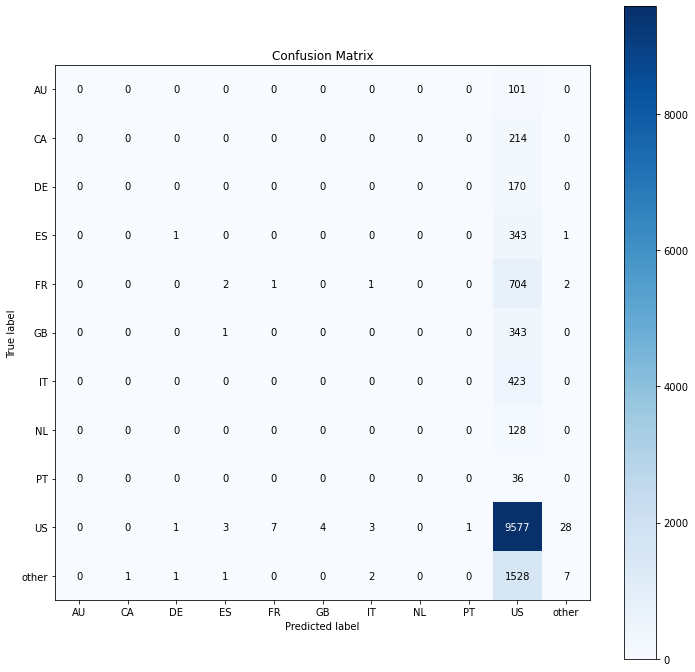

In [ ]:
#Accuracy
acc_nn = m.accuracy_score(y_val_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

#Confusion Matrix
mt.plot_confusion_matrix( y_val_nn, yhat_nn, normalize= False, figsize=(12,12))

#Balanced Accuracy
balanced_accuracy = m.balanced_accuracy_score(y_val_nn, yhat_nn )
print('Balanced Accuracy: {}'.format(balanced_accuracy))

#Kappa Metrics
kappa_score = m.cohen_kappa_score(y_val_nn, yhat_nn)
print('Kappa Score: {}'.format(kappa_score))

#Objetivo é aumentar o Balanced Accuracy para uns 85% (Acuracia para apresentar ao time de negocio
#Kappa Score uns 75% (Nivel de concordancia entre as classes).

#print(m.classification_report(y_val_nn, yhat_nn))

### NN Performance - Cross-Validation

# 9.0 Hyperparameter Fine Tuning

# 10 Performance Model